## Dimensionality reduction

We will test some of the dimensionality reduction techniques on the [UFO dataset](https://drive.google.com/file/d/0B2gZvn36c5CmRTJpS3pkUllmX1U/view?usp=sharing) from the last week.




### PCA

Subset all **weather related** features from the data and run PCA over it. 


1. Extract the 2 best principal components (k=2). 
1. Plot the **feature** space into the new space. 
    - We should create a scatter plot with 1st component on the axis x and second component on y. 
    - The length of each component is equal to number of columns (features) we have in our data before PCA.
    - Points in the graph that are close to each other are similar features. We need to anotate the points with feature names.
1. Observe which features have similar meaning and which have opposite.
    - Features close to each other have similar meaning.
1. Select the optimal number of dimensions to keep - *k* (find the explained variance of each component and use the elbow rule)
1. Create a projection of your data into the *k* axes of the trained PCA
1. Export the data with the new features. Number of rows should be the same as in the original dataset.

In [20]:
import pandas as pd
import numpy as np
data = pd.read_csv("/Users/jurajkapasny/Drive/Data/ufo-sightings/UFO_data.csv", sep=";", low_memory=False).set_index("Unnamed: 0")


In [2]:
weather_feats = ['apparentTemperature', u'cloudCover', u'dewPoint', 
         u'humidity', u'precipIntensity', u'precipProbability',
         u'pressure', u'temperature', u'visibility', u'windBearing', 
         u'windSpeed']

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pca = PCA(n_components=2, random_state=42)
pca.fit(StandardScaler()
        .fit_transform(SimpleImputer(strategy="median")
                       .fit_transform(data[weather_feats])))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

## 1

In [14]:
# extracting components
pca.components_

array([[ 0.55591022,  0.03798681,  0.5255704 , -0.00089789,  0.07428468,
         0.08842045, -0.29286983,  0.55564588, -0.05324999, -0.0510294 ,
        -0.00217674],
       [-0.15628258,  0.44995259,  0.08244791,  0.42401918,  0.36346332,
         0.46935178, -0.06105423, -0.15752178, -0.43872772, -0.09333451,
         0.06631547]])

## 2

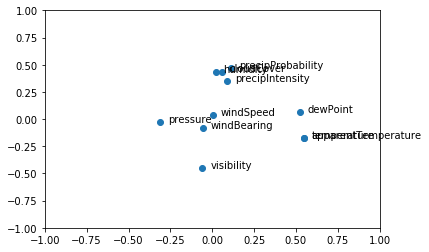

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlim(-1,1)
plt.ylim(-1,1)

ind = 0
for i,j in zip(pca.components_[0],
               pca.components_[1]):
    ax.annotate(weather_feats[ind], xy=(i,j), xytext=(8,0), textcoords='offset points')
    ind += 1
plt.show()

## 3
- similar meaning: [windSpeed, pressure, windBearing], [apparentTemperature, temperature], [precipIntensity, precipProbability]
- opposite meaning: [visibility, precipIntensity], [visibility, dewPoint]...

## 4
Plot the number of components vs. explained variance

In [33]:
# PCA with number of componenets equal to number of features
pca = PCA(n_components=len(weather_feats), random_state=42)
pca.fit(StandardScaler()
        .fit_transform(SimpleImputer(strategy="median")
                       .fit_transform(data[weather_feats])))

PCA(copy=True, iterated_power='auto', n_components=11, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
# creating cumulative explained variance
print(pca.explained_variance_ratio_)
print("")
print(np.cumsum(pca.explained_variance_ratio_))

[0.2692969  0.19953907 0.12932692 0.10499692 0.08519328 0.06178766
 0.05788439 0.05274546 0.0372339  0.00152517 0.00047032]

[0.2692969  0.46883597 0.59816289 0.70315981 0.78835309 0.85014075
 0.90802514 0.9607706  0.99800451 0.99952968 1.        ]


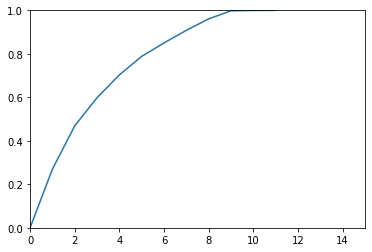

In [36]:
# plotting
import matplotlib.pyplot as plt
%matplotlib inline

x = range(len(pca.explained_variance_ratio_)+1)
y = [0]+ list(np.cumsum(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x, y)
plt.xlim(0,15)
plt.ylim(0,1)

plt.show()

We don't have a clear elbow here. It could be 2, 4 5 or iven 9. We can use the combination of elbow rule and scatter plot above. There, we can see **4 "clusters"** of features if we consider dewPoint and teperature to be in one cluster. Therefore, we can take 4 components as the optimal number.

## 5

In [39]:
pca = PCA(n_components=4, random_state=42)
sc = StandardScaler()
si = SimpleImputer(strategy="median")
si.fit(data[weather_feats])
sc.fit(si.transform(data[weather_feats]))
# fitting the PCA
pca.fit(sc.transform(si.transform(data[weather_feats])))
# projection of the data into the 4 axes of the trained PCA
pca_data = pca.transform(sc.transform(si.transform(data[weather_feats])))

In [41]:
pca_data = pd.DataFrame(pca_data, columns = ["pca_1","pca_2","pca_3","pca_4"])

In [46]:
pca_data.shape[0] == data.shape[0]

True

## 6

In [47]:
pca_data.to_csv("./pca_data.csv",index=False)